In [16]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')

In [17]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [18]:
df = pd.read_csv('combined_crop_dataset.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2500 non-null   int64  
 1   P            2500 non-null   int64  
 2   K            2500 non-null   int64  
 3   temperature  2500 non-null   float64
 4   humidity     2500 non-null   float64
 5   ph           2500 non-null   float64
 6   rainfall     2500 non-null   float64
 7   label        2500 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 156.4+ KB


In [20]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee',
       'tomato', 'potato', 'onion'], dtype=object)

In [21]:
df['label'].value_counts()

rice           100
watermelon     100
potato         100
tomato         100
coffee         100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
grapes         100
maize          100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
onion          100
Name: label, dtype: int64

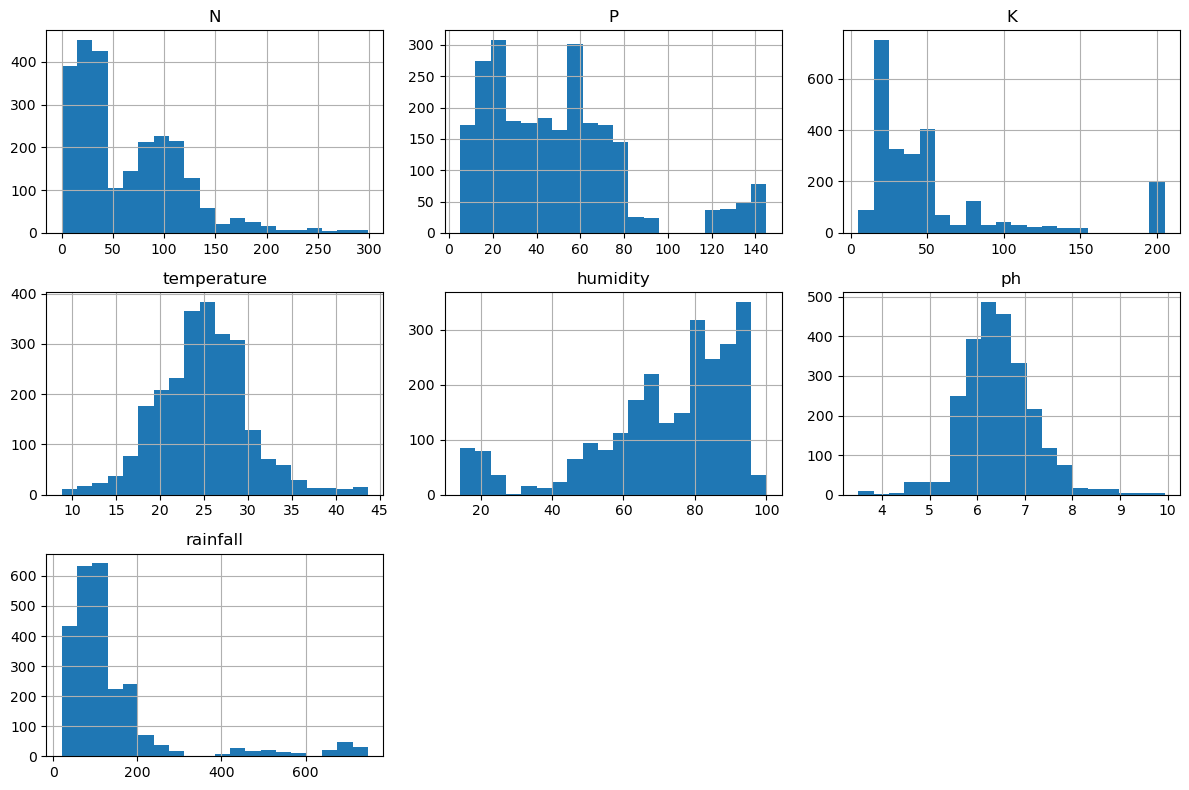

In [22]:
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

<Axes: >

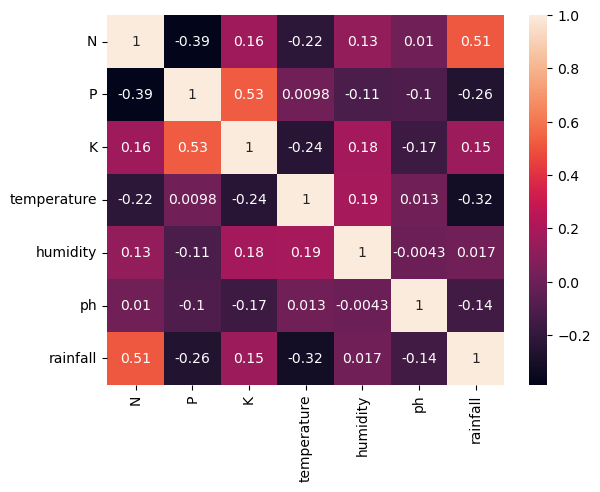

In [23]:
numeric_df = df.select_dtypes(include='number')  # Select numeric columns only
sns.heatmap(numeric_df.corr(), annot=True)

In [24]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [25]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [26]:
# Initializing empty lists to append all MODEL'S NAME and corresponding ACCURACY
accuracy = []
model = []

LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.964
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        24
   blackgram       0.94      0.89      0.91        18
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       0.95      1.00      0.97        19
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        24
        jute       0.91      0.84      0.88        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.81      1.00      0.90        13
       maize       1.00      0.76      0.87        17
       mango       1.00      0.96      0.98        24
   mothbeans       0.85      0.94      0.89        18
    mungbean       1.00      0.85      0.92        20
   muskmelon       1.00      1.00      1.00        24
       onion       1.00      1.00      

In [28]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.958, 0.962, 0.958, 0.972, 0.948])

In [29]:

# Dump the trained Naive Bayes classifier 
joblib.dump(LogReg, 'LogisticRegression.pkl')
 


['LogisticRegression.pkl']

RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=5)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.996
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        18
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        24
        jute       0.96      0.96      0.96        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        13
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        24
       onion       1.00      1.00      1.00        21
  

In [31]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.996, 0.996, 0.996, 0.996, 0.988])

In [32]:
# Dump the trained Naive Bayes classifier 
joblib.dump(RF, 'RandomForest.pkl')
 


['RandomForest.pkl']

DECISION TREE

In [33]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  89.8
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        24
   blackgram       0.85      0.94      0.89        18
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        24
        jute       0.75      0.12      0.21        25
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.91      0.77      0.83        13
       maize       0.77      1.00      0.87        17
       mango       1.00      1.00      1.00        24
   mothbeans       0.82      0.78      0.80        18
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        24
       onion       1.00      1.00      1.00   

In [34]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.946, 0.926, 0.88 , 0.886, 0.874])

In [35]:
# Dump the trained Naive Bayes classifier 
joblib.dump(DecisionTree, 'DecisionTree.pkl')
 


['DecisionTree.pkl']

ACCURACY COMPARISSION

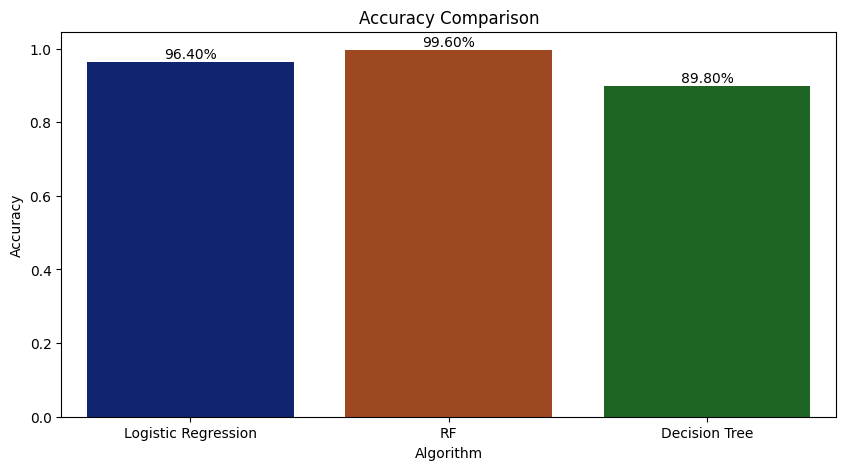

In [52]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x=model, y=accuracy, palette='dark')

# Add accuracy percentages above each bar
for i, accuracy in enumerate(accuracy):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2%}', ha='center')

plt.show()

PREDICTION

In [57]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [54]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [59]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = DecisionTree.predict(data)
print(prediction)

['rice']


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (2000, 7) (2000,)
Testing set: (500, 7) (500,)


Accuracy of Logistic Regression Model for each crop

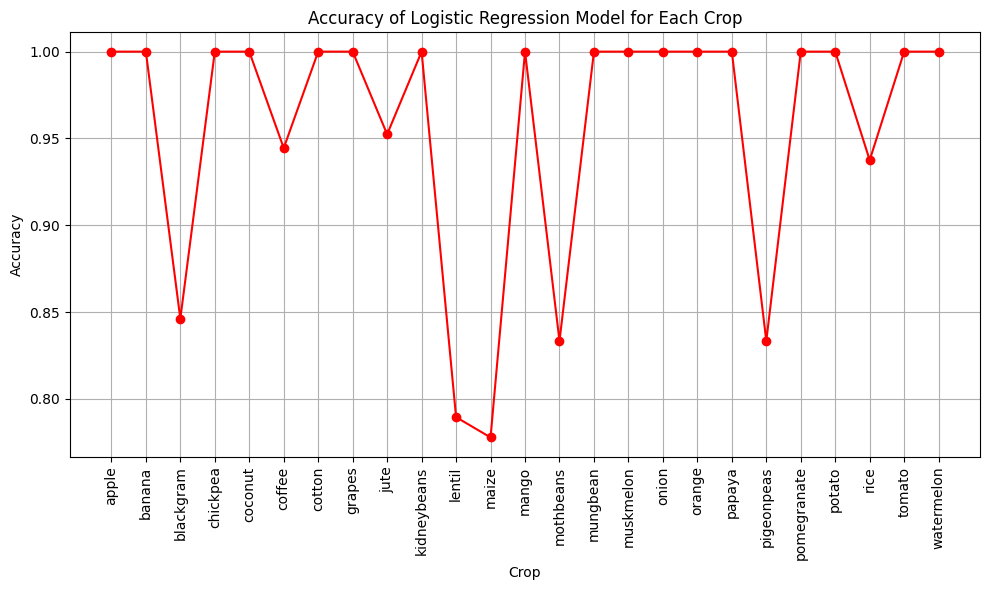

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(random_state=2)
LR_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = LR_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Logistic Regression model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='red', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of Logistic Regression Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()


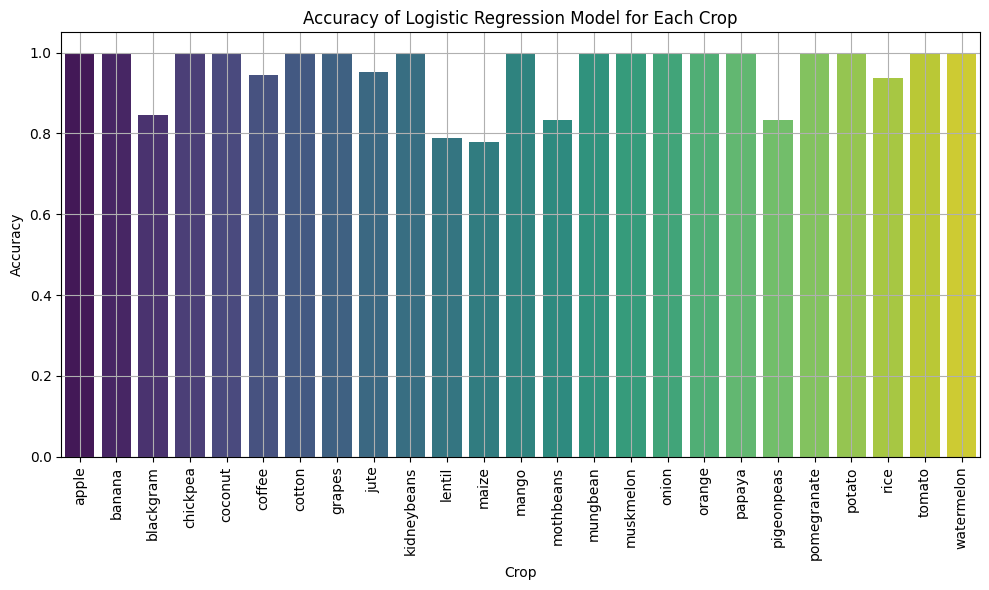

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(random_state=2)
LR_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = LR_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Logistic Regression model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Logistic Regression Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy of RANDOM FOREST Model for each crop

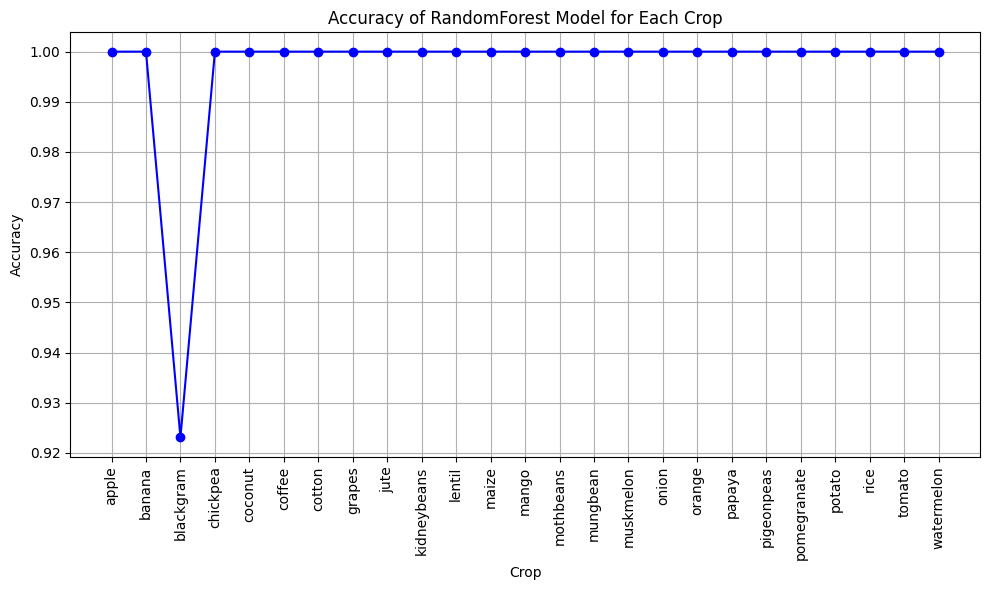

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the RandomForest model
RF_model = RandomForestClassifier(n_estimators=20, random_state=5)
RF_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = RF_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the RandomForest model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='blue', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of RandomForest Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
#plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()

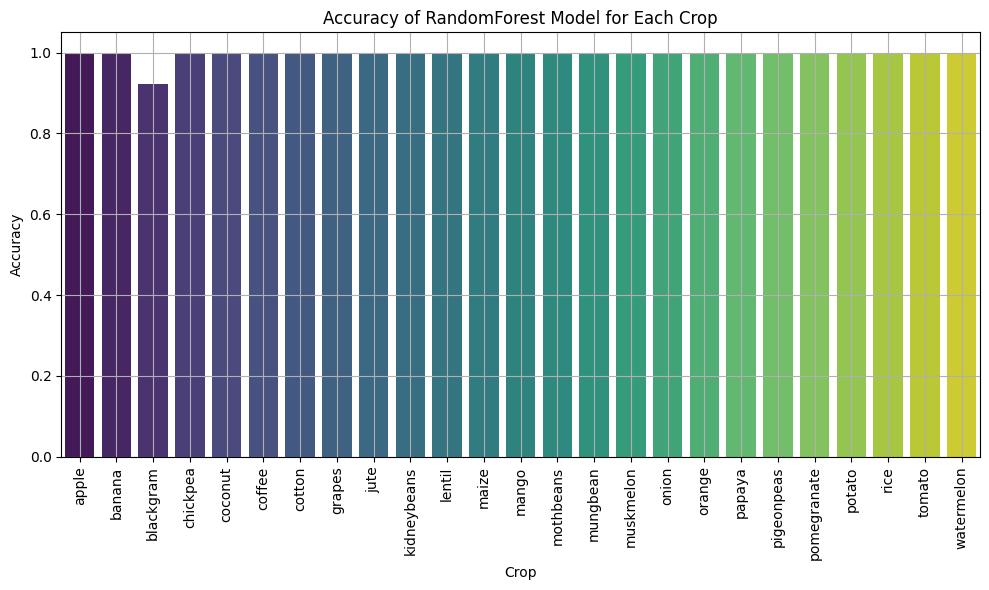

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the RandomForest model
RF_model = RandomForestClassifier(n_estimators=20, random_state=5)
RF_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = RF_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the RandomForest model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of RandomForest Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
#plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy of Decision Tree Model for each crop

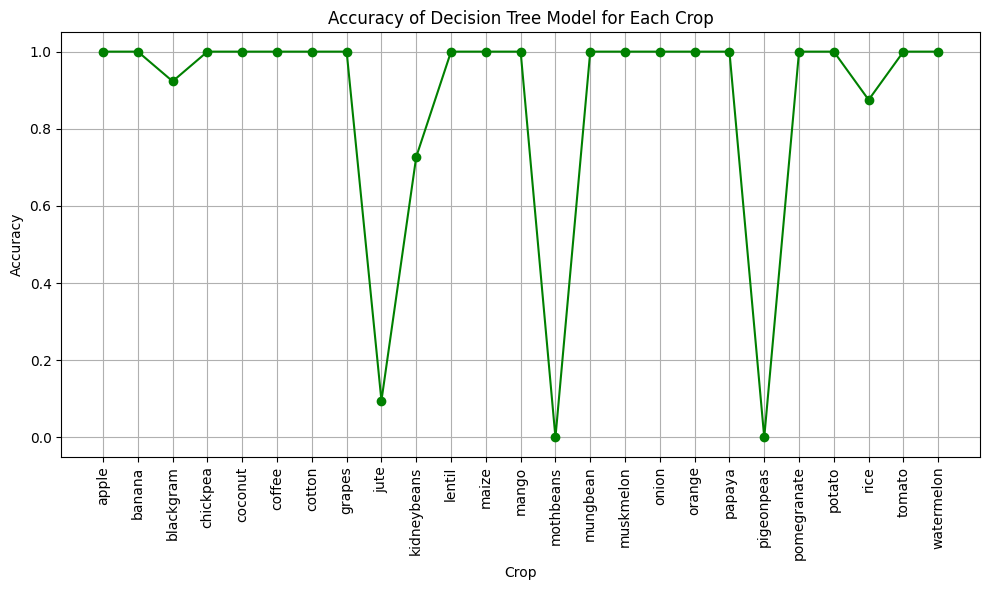

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DT_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = DT_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Decision Tree model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='green', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of Decision Tree Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

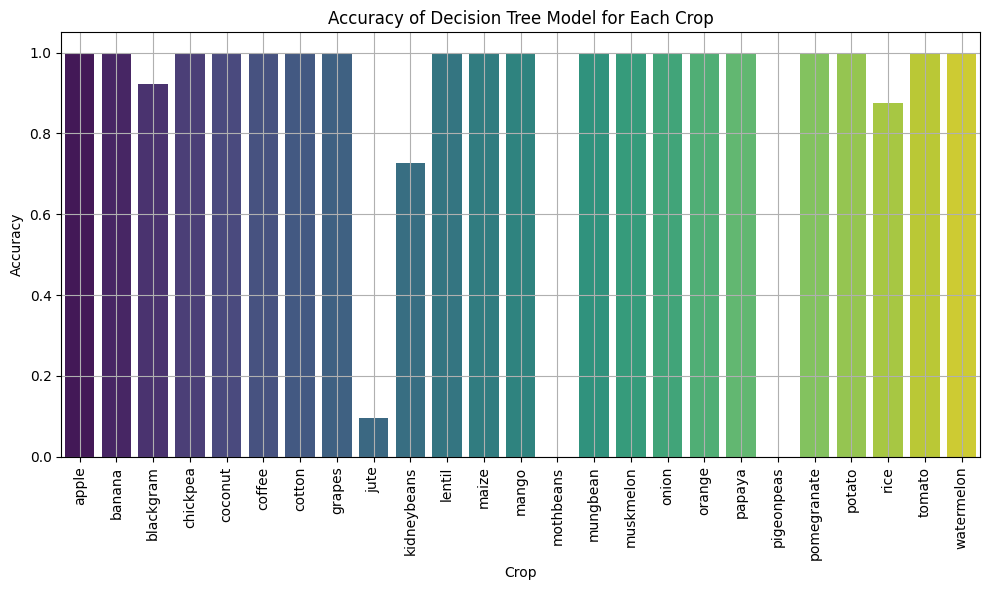

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DT_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = DT_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Decision Tree model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Decision Tree Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
data = np.array([[1, 7, 3, 50, 39.90, 3, 70.2]])
prediction = RF.predict(data)
print(prediction)

['orange']
